In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset (replace 'path_to_your_data.csv' with the actual file path)
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [3]:
# Split the data into features (X) and target variable (y)
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Create a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



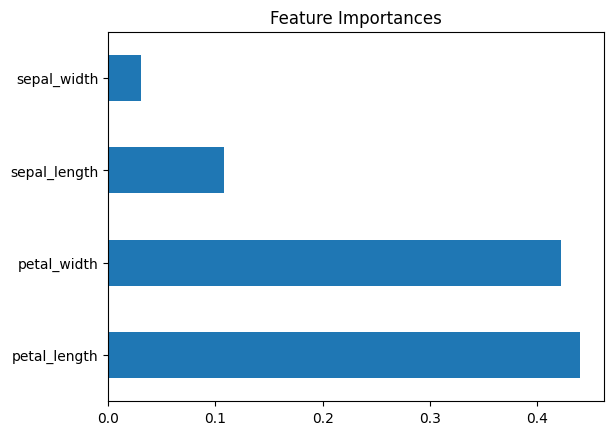

In [8]:
# Visualize feature importances
feature_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh')
plt.title('Feature Importances')
plt.show()